In [2]:
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

Загружаем данные и разделяем их на тренировочную и тестовую выборки

In [3]:
breast_cancer = load_breast_cancer()
X_ = breast_cancer.data
y_ = breast_cancer.target
X_2d = X_[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_2d, y_)

In [4]:
clf = SVC(C=0.01)
 
clf.fit(X_train, y_train)
 
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.7276995305164319
0.7832167832167832


Строим графики обучения

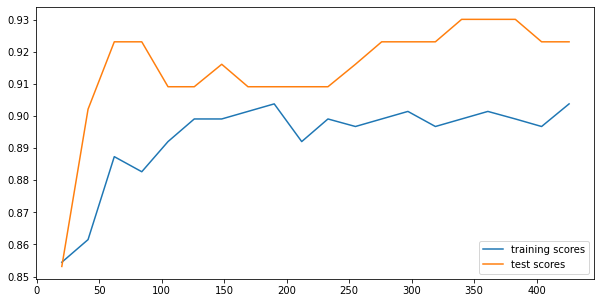

In [6]:
training_scores = []
test_scores = []
numbers = []
 
for i in np.linspace(20, len(X_train), 20):
    
    clf = SVC(C=10, kernel='rbf')
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")
plt.show()

Зависимость качества модели от показателя нормализации

In [7]:
for i in range(-4, 7):
    X_2d = X_[:, :2]
    X_train, X_test, y_train, y_test = train_test_split(X_2d, y_)
    
    r = 10 ** i
    clf = SVC(C=r)
    clf.fit(X_train, y_train)

    print(r, clf.score(X_train, y_train), clf.score(X_test, y_test))

0.0001 0.6408450704225352 0.5874125874125874
0.001 0.6173708920187794 0.6573426573426573
0.01 0.6924882629107981 0.7132867132867133
0.1 0.903755868544601 0.916083916083916
1 0.9107981220657277 0.8811188811188811
10 0.9084507042253521 0.9020979020979021
100 0.9178403755868545 0.8951048951048951
1000 0.9107981220657277 0.8881118881118881
10000 0.9107981220657277 0.8951048951048951
100000 0.9272300469483568 0.8601398601398601
1000000 0.9084507042253521 0.8741258741258742


Зависимость качества модели от размера параметров

In [8]:
for i in range(30):
    X_2d = X_[:, :i + 1]
    X_train, X_test, y_train, y_test = train_test_split(X_2d, y_)
    clf = SVC(C=0.01)
    
    clf.fit(X_train, y_train)

    print(i, clf.score(X_train, y_train), clf.score(X_test, y_test))

0 0.8286384976525821 0.7622377622377622
1 0.6901408450704225 0.6923076923076923
2 0.6338028169014085 0.6083916083916084
3 0.7676056338028169 0.8251748251748252
4 0.7816901408450704 0.7062937062937062
5 0.7370892018779343 0.8461538461538461
6 0.7206572769953051 0.6363636363636364
7 0.7676056338028169 0.7132867132867133
8 0.7676056338028169 0.7622377622377622
9 0.7230046948356808 0.6993006993006993
10 0.7370892018779343 0.7062937062937062
11 0.755868544600939 0.7902097902097902
12 0.7276995305164319 0.6503496503496503
13 0.7723004694835681 0.7482517482517482
14 0.7488262910798122 0.7762237762237763
15 0.7300469483568075 0.6643356643356644
16 0.7417840375586855 0.7832167832167832
17 0.7112676056338029 0.7202797202797203
18 0.7253521126760564 0.6853146853146853
19 0.7417840375586855 0.7062937062937062
20 0.7605633802816901 0.7412587412587412
21 0.687793427230047 0.6573426573426573
22 0.7300469483568075 0.7622377622377622
23 0.7676056338028169 0.7902097902097902
24 0.7769953051643192 0.8181

In [9]:
X_2d = X_[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_2d, y_)
clf = SVC(kernel='linear', C=0.01)
 
clf.fit(X_train, y_train)
 
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8967136150234741
0.8531468531468531


Зависимость качества модели от количества данных в выборке

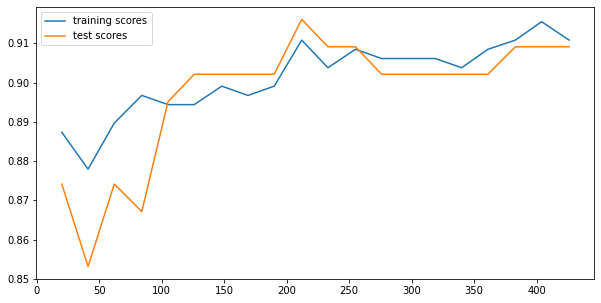

In [10]:
training_scores = []
test_scores = []
numbers = []
 
for i in np.linspace(20, len(X_train), 20):
    
    clf = SVC(C=10, kernel='rbf')
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

Вывод: качество модели зависит от её гиперпараметров 